Make the notebook wider (if you think this makes the notebook look prettier)

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Import the library with all predefine functions

In [2]:
import lazy_pipeline as lpipe

Check library versions

In [3]:
from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.9.12
1.5.2
1.1.3


Run seamlessly on 
* python = 3.9.13, 
* pandas = 1.5.1
* scikit-learn = 1.1.3

# Prepare tic tac toe the data

Load data

In [4]:
df = lpipe.load_data('tic_tac_toe')
print(df.shape)
df.head()

(958, 10)


,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


Binarize data

In [5]:
y_name = 'Class'

In [6]:
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(958, 27)


,top-left-square: b,top-left-square: o,top-left-square: x,top-middle-square: b,top-middle-square: o,top-middle-square: x,top-right-square: b,top-right-square: o,top-right-square: x,middle-left-square: b,...,middle-right-square: x,bottom-left-square: b,bottom-left-square: o,bottom-left-square: x,bottom-middle-square: b,bottom-middle-square: o,bottom-middle-square: x,bottom-right-square: b,bottom-right-square: o,bottom-right-square: x
0,False,False,True,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
1,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
2,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
3,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
4,False,False,True,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False


Shuffle the data to drop any initial ordering of rows. For example, if the dataset is constructed first from all positive examples and then all negative examples.

_NB: Skip this step if your data is sequential and rows ordering is important. For example, if your dataset contains a "date" feature._

In [7]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X

Represent data $X$ as list of subsets of attributes to better suit the theory.

In [8]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'bottom-left-square: x',
 'bottom-middle-square: o',
 'bottom-right-square: x',
 'middle-left-square: b',
 'middle-middle-square: x',
 'middle-right-square: x',
 'top-left-square: o',
 'top-middle-square: o',
 'top-right-square: o'}

And, for being consisted, convert $y$ to list too.

In [9]:
y_list = y.values.tolist()

Assume that at the very begining, we know the labels only for the first 20% of rows.

In [10]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(95, 863)

Set up the test target labels $y$

In [11]:
y_test = y_list[n_train:]

# Make predictions for base algorithm

Make predictions and measure time required to obtain these predictions

In [12]:
# %%time
# gen = lpipe.predict_array(X_bin, y_list, n_train, use_tqdm=True)
# y_preds, t_preds = lpipe.apply_stopwatch(gen)

In [13]:
# %%time
# gen = list(lpipe.predict_array(X_bin, y_list, n_train, use_tqdm=True, update_train=False))
# y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Evaluate predictions

Here we decided to measure Accuracy and F1 score simply because there ones of the most popular scores. Feel free to use more elaborate scorings.

In [14]:
from sklearn.metrics import accuracy_score, f1_score
#
# score_vals = {}
# for score_f in [accuracy_score, f1_score]:
#     score_name = score_f.__name__
#     preds = y_preds
#     score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
#
#     score_name = score_f.__name__ + '_fixedtrain'
#     preds = y_preds_fixedtrain
#     score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

# Make prediction for new algorithm

In [28]:
from lazy_fca_estimator import LazyFCA
from undefine_scores import f1_undefine_score, recall_undefine_score, accuracy_undefine_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.utils import check_X_y
from sklearn.utils.multiclass import unique_labels


y = df[y_name]
X = df.drop(y_name, axis=1)

fca = LazyFCA()
parametrs = {
    "consistency_threshold": [0.8, 0.9],
    "undefined_treshhold": [0.8, 0.9],
    "min_extent_size": [2, 3, 5],
    "check_number": [1, 2, 3],
    "update_train": [True, False]
}
clf = GridSearchCV(
    fca, parametrs, 
    scoring=make_scorer(accuracy_undefine_score), 
    n_jobs=-1, verbose=2)

clf.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END check_number=1, consistency_threshold=0.8, min_extent_size=2, undefined_treshhold=0.9, update_train=True; total time=   0.6s
[CV] END check_number=1, consistency_threshold=0.8, min_extent_size=2, undefined_treshhold=0.8, update_train=True; total time=   0.8s
[CV] END check_number=1, consistency_threshold=0.8, min_extent_size=3, undefined_treshhold=0.8, update_train=True; total time=   0.8s
[CV] END check_number=1, consistency_threshold=0.8, min_extent_size=2, undefined_treshhold=0.8, update_train=False; total time=   1.5s
[CV] END check_number=1, consistency_threshold=0.8, min_extent_size=2, undefined_treshhold=0.8, update_train=True; total time=   2.5s
[CV] END check_number=1, consistency_threshold=0.8, min_extent_size=2, undefined_treshhold=0.9, update_train=False; total time=   1.5s
[CV] END check_number=1, consistency_threshold=0.8, min_extent_size=3, undefined_treshhold=0.8, update_train=False; total time=   1.

GridSearchCV(estimator=LazyFCA(numerical_preprocessing=<function LazyFCA._basic_interval at 0x7fd2a858aaf0>),
             n_jobs=-1,
             param_grid={'check_number': [1, 2, 3],
                         'consistency_threshold': [0.8, 0.9],
                         'min_extent_size': [2, 3, 5],
                         'undefined_treshhold': [0.8, 0.9],
                         'update_train': [True, False]},
             scoring=make_scorer(accuracy_undefine_score), verbose=2)

In [31]:
clf.best_score_, clf.cv_results_

(0.6952443280977313,
 {'mean_fit_time': array([0.00328822, 0.0021101 , 0.00255375, 0.0024272 , 0.00247374,
         0.00211921, 0.00210314, 0.0022716 , 0.00248766, 0.00216808,
         0.00289679, 0.00489712, 0.00255942, 0.00246491, 0.00272565,
         0.00281682, 0.00219126, 0.00216689, 0.00214705, 0.00236201,
         0.00252781, 0.00232654, 0.00230932, 0.00267539, 0.00225158,
         0.00247049, 0.00209322, 0.00224442, 0.0021832 , 0.00224605,
         0.00246425, 0.00246882, 0.00222845, 0.00230904, 0.00216303,
         0.00220881, 0.00220413, 0.00201139, 0.00241113, 0.00207682,
         0.0021317 , 0.0021358 , 0.00218329, 0.00225396, 0.00221777,
         0.00218201, 0.0021884 , 0.00254068, 0.00235043, 0.0021451 ,
         0.00286479, 0.00210848, 0.00218158, 0.0023253 , 0.0026226 ,
         0.00220432, 0.00223498, 0.00279779, 0.00227079, 0.00226717,
         0.00231509, 0.0021224 , 0.00219016, 0.00217347, 0.00204673,
         0.00216441, 0.00222363, 0.00218663, 0.00209913, 0.002252

# Analyze results

NameError: name 'score_vals' is not defined

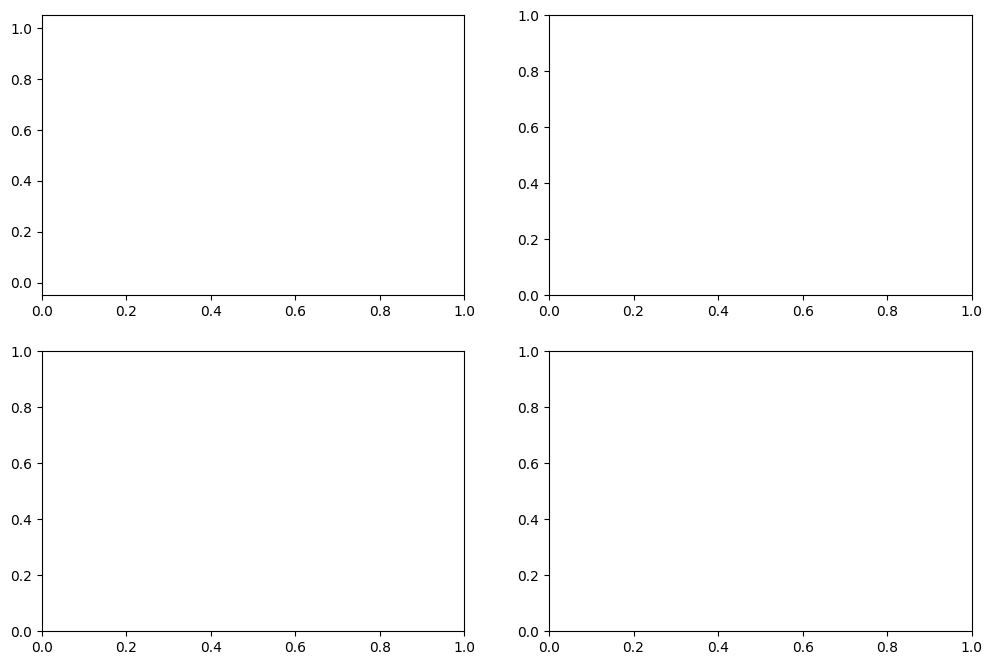

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('image/Classifier_comparison.png')
plt.show()

In conclusion:

...